In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
import pandas as pd
df = pd.read_csv("candy.csv")

In [5]:
df.isnull().sum()

id                  0
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        2
pricepercent        0
winpercent          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for i in df.columns:
  if i in df.select_dtypes("object").columns:
    df[i] = LabelEncoder.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 82
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                81 non-null     int64  
 1   competitorname    81 non-null     int64  
 2   chocolate         81 non-null     int64  
 3   fruity            81 non-null     int64  
 4   caramel           81 non-null     int64  
 5   peanutyalmondy    81 non-null     int64  
 6   nougat            81 non-null     int64  
 7   crispedricewafer  81 non-null     int64  
 8   hard              81 non-null     int64  
 9   bar               81 non-null     int64  
 10  pluribus          81 non-null     int64  
 11  sugarpercent      81 non-null     float64
 12  pricepercent      81 non-null     float64
 13  winpercent        81 non-null     float64
dtypes: float64(3), int64(11)
memory usage: 9.5 KB
None


In [9]:
X = df.drop('bar', axis=1)

In [10]:
y = df['bar']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105, shuffle=True)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
mlp = MLPClassifier(hidden_layer_sizes=(6,12), max_iter=100)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [15]:
acc = accuracy_score(y_test, predictions)
acc

0.8

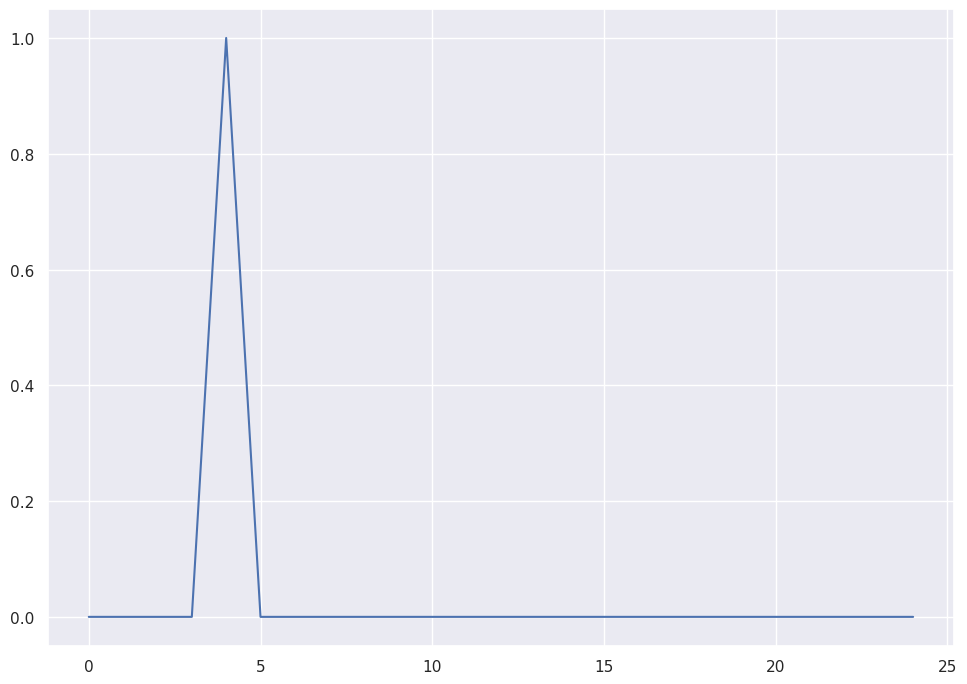

In [16]:
plt.plot(predictions)